### Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import os

# load Dubai font
font_path = r"C:\Windows\Fonts\Dubai-Regular.ttf"
dubai_font = fm.FontProperties(fname=font_path)

### Load Data

In [2]:
input_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\02 Data\Original Data"
file_name = "World-happiness-report-updated_2024.csv"
full_path = os.path.join(input_path, file_name)

df = pd.read_csv(full_path, encoding='latin1')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


### Clean and Prepare the Data

In [3]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
df = df[numeric_cols]

### Correlation Heatmap

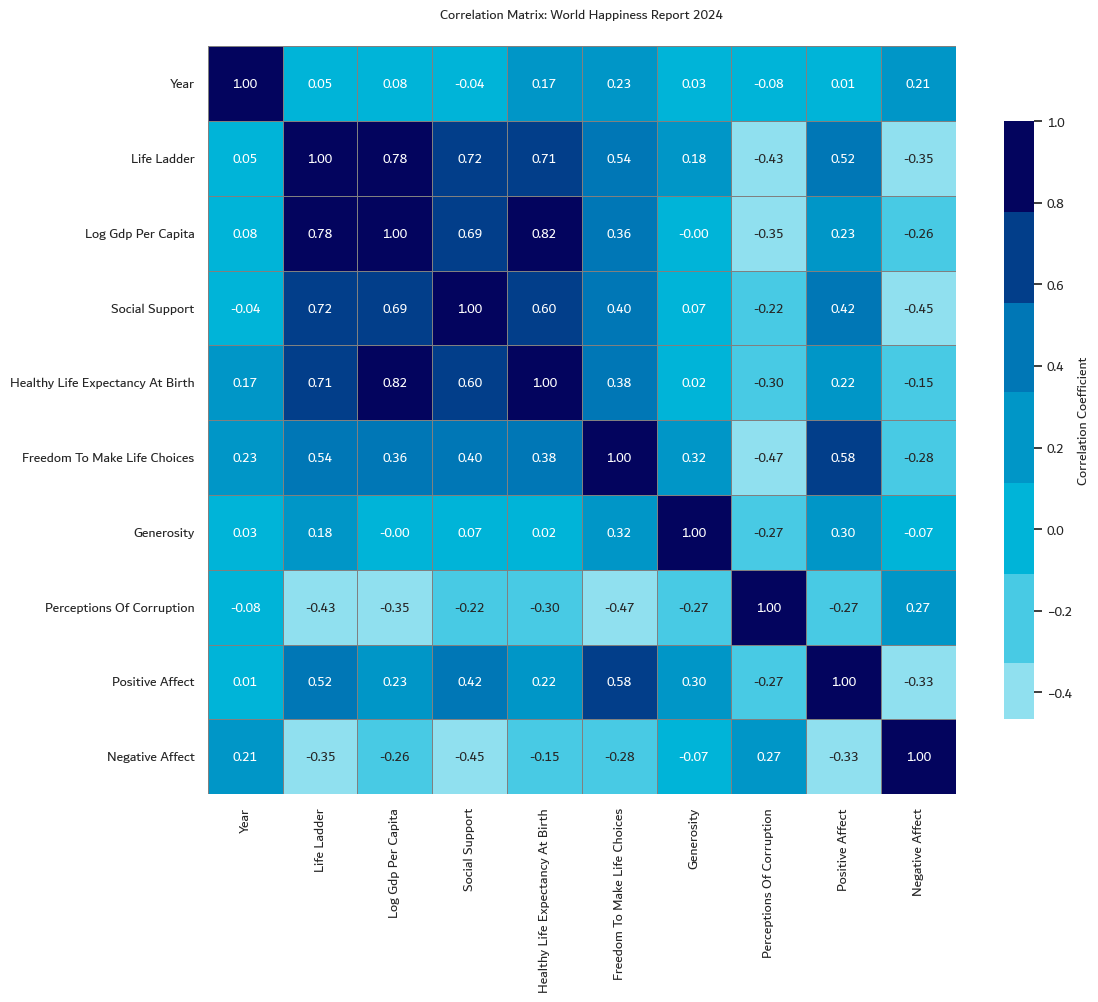

In [8]:
# Capitalize column names
df.columns = [col.title() for col in df.columns]

# Correlation matrix
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Coolors palette
blue_reversed_palette = [
    "#caf0f8", "#ade8f4", "#90e0ef", "#48cae4",
    "#00b4d8", "#0096c7", "#0077b6", "#023e8a", "#03045e"
]

# Styling
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=sns.color_palette(blue_reversed_palette),
    center=0,
    square=True,
    linewidths=0.6,
    linecolor='gray',
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Set axis tick fonts
for label in heatmap.get_xticklabels():
    label.set_fontproperties(dubai_font)
for label in heatmap.get_yticklabels():
    label.set_fontproperties(dubai_font)

# Set annot font
for text in heatmap.texts:
    text.set_fontproperties(dubai_font)

# Set colorbar label and ticks font
colorbar = heatmap.collections[0].colorbar
colorbar.ax.yaxis.label.set_fontproperties(dubai_font)
for label in colorbar.ax.get_yticklabels():
    label.set_fontproperties(dubai_font)

# Set title
plt.title('Correlation Matrix: World Happiness Report 2024',
          fontsize=24, weight='bold', pad=20, fontproperties=dubai_font)

# Final layout
plt.tight_layout()

# Save the plot
output_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.2_Correlation Matrix - World Happiness Report 2024.jpg"
plt.savefig(output_path, dpi=600, bbox_inches='tight', format='jpg')
plt.show()

## 🔍 Interpreting the Correlation Matrix: World Happiness Report 2024

The correlation matrix above visualizes the relationships between key variables from the World Happiness Report 2024. Each cell shows the correlation coefficient (ranging from -1 to 1), which measures the strength and direction of the linear relationship between two variables.

### Key Takeaways

- **Strong Positive Relationships 💪:**  
    - **Life Ladder** (happiness score) is strongly positively correlated with **Log GDP Per Capita** (0.78), **Social Support** (0.72), and **Healthy Life Expectancy At Birth** (0.71).  
    - This means that as income, social support, and health increase, happiness tends to rise as well.

- **Freedom & Positive Emotions 😃:**  
    - **Freedom to Make Life Choices** has a notable positive correlation with **Life Ladder** (0.54) and **Positive Affect** (0.58).  
    - Societies that feel more freedom to make choices tend to be happier and report more positive emotions.

- **Negative Associations 🚩:**  
    - **Perceptions of Corruption** is negatively correlated with happiness (-0.43) and freedom (-0.47), showing that higher perceived corruption is linked to lower happiness and less perceived freedom.
    - **Negative Affect** is negatively correlated with most variables, especially **Social Support** (-0.45) and **Positive Affect** (-0.33).  
    - This means where people feel supported and positive, negative emotions are less common.

- **Moderate or Weak Relationships 🟦:**  
    - **Generosity** generally shows weak correlations with other variables, except a modest link with **Freedom** (0.32).
    - Some variables, like **Log GDP Per Capita** and **Generosity** (-0.00), show virtually no relationship—meaning economic strength doesn’t directly relate to generosity.

# Scatterplots

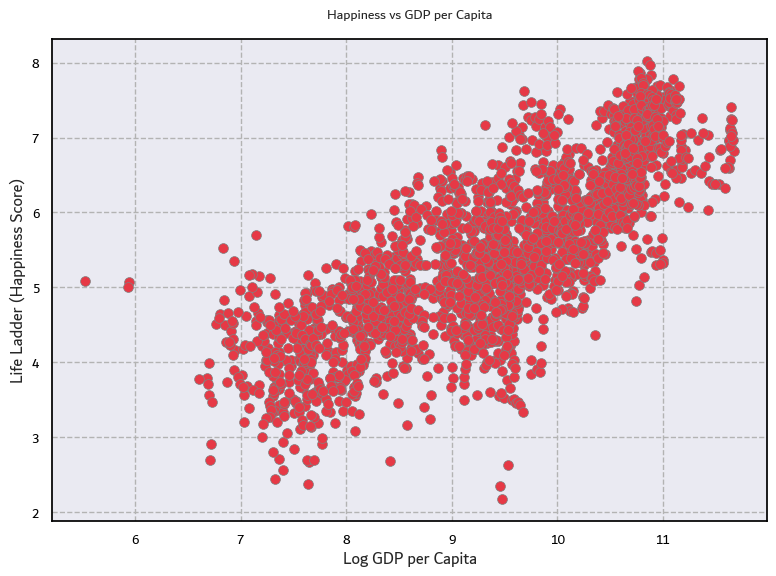

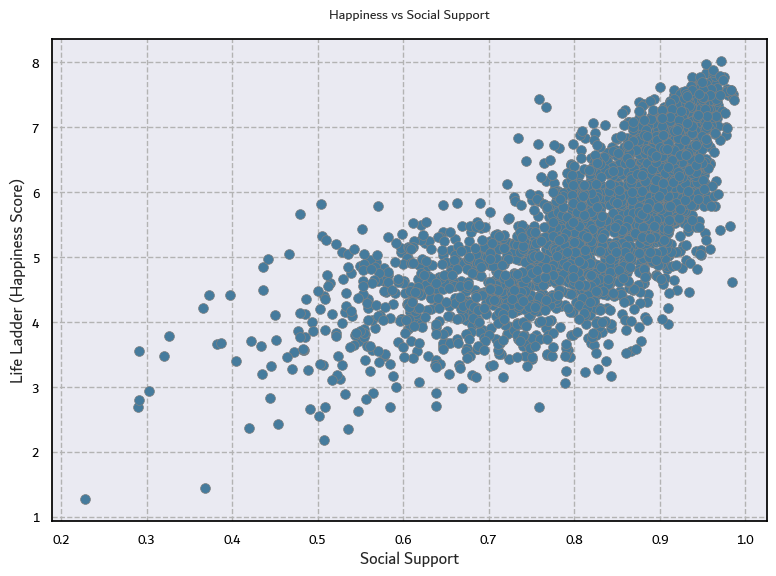

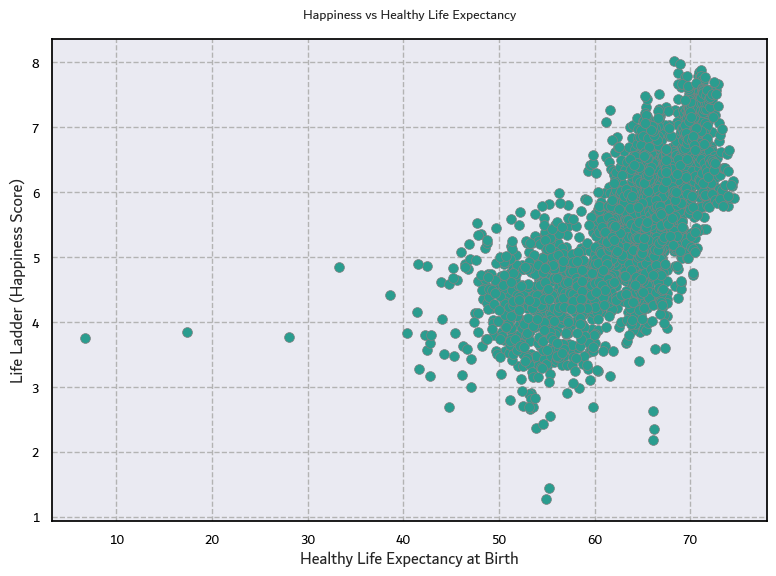

In [11]:
# Style
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.2)
output_dir = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis"

# Styling function
def style_axes(ax):
    ax.grid(True, linestyle='--', color='0.7')
    for spine in ax.spines.values():
        spine.set_color('black')
    ax.tick_params(axis='both', direction='out', length=6, width=1, colors='black')

# === Plot 1: GDP vs Life Ladder ===
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    x='Log Gdp Per Capita',
    y='Life Ladder',
    data=df,
    s=50,
    color='#e63946',
    edgecolor='0.5',
    linewidth=0.5
)
plt.title('Happiness vs GDP per Capita', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xlabel('Log GDP per Capita', fontsize=12, fontproperties=dubai_font)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12, fontproperties=dubai_font)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)
style_axes(ax)
plt.tight_layout()
plt.savefig(f"{output_dir}\\6.2_GDP vs Life Ladder.jpg", dpi=600, format='jpg')
plt.show()

# === Plot 2: Social Support vs Life Ladder ===
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    x='Social Support',
    y='Life Ladder',
    data=df,
    s=50,
    color='#457b9d',
    edgecolor='0.5',
    linewidth=0.5
)
plt.title('Happiness vs Social Support', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xlabel('Social Support', fontsize=12, fontproperties=dubai_font)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12, fontproperties=dubai_font)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)
style_axes(ax)
plt.tight_layout()
plt.savefig(f"{output_dir}\\6.2_Social Support vs Life Ladder.jpg", dpi=600, format='jpg')
plt.show()

# === Plot 3: Healthy Life Expectancy vs Life Ladder ===
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    x='Healthy Life Expectancy At Birth',
    y='Life Ladder',
    data=df,
    s=50,
    color='#2a9d8f',
    edgecolor='0.5',
    linewidth=0.5
)
plt.title('Happiness vs Healthy Life Expectancy', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xlabel('Healthy Life Expectancy at Birth', fontsize=12, fontproperties=dubai_font)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12, fontproperties=dubai_font)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)
style_axes(ax)
plt.tight_layout()
plt.savefig(f"{output_dir}\\6.2_Healthy Life Expectancy vs Life Ladder.jpg", dpi=600, format='jpg')
plt.show()

## 📊 Exploring the Relationship Between Key Factors and Happiness

### 1. Happiness vs Log GDP per Capita

The first plot shows a clear positive relationship between economic prosperity (Log GDP per Capita) and happiness. As countries become wealthier, average happiness scores tend to increase. While there is some spread at lower GDP levels, higher GDP almost always correlates with higher happiness. This suggests that economic factors play a substantial role in life satisfaction globally, though it’s not the only factor at play.

---

### 2. Happiness vs Healthy Life Expectancy at Birth

The second plot demonstrates that countries with higher healthy life expectancy also tend to report higher happiness scores. The relationship is again positive and quite strong, indicating that better health outcomes are closely tied to higher life satisfaction. There are very few high-happiness countries with low healthy life expectancy, underscoring the importance of public health.

---

### 3. Happiness vs Social Support

The third plot reveals a strong positive association between social support and happiness. As the level of social support rises, so does the average happiness score. The clustering of high-happiness scores at higher levels of social support suggests that societies where people feel they can rely on others are also those where people are happiest.

### Cleaned & Enhanced Code (without outkiers)

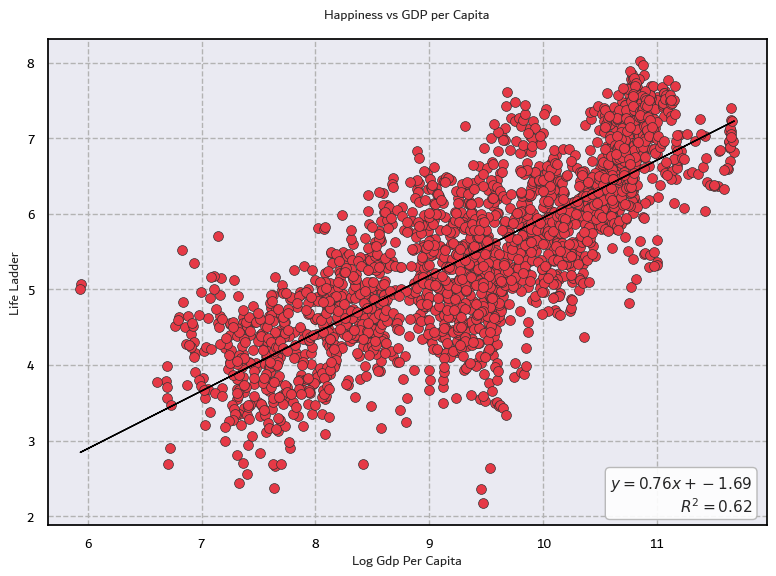

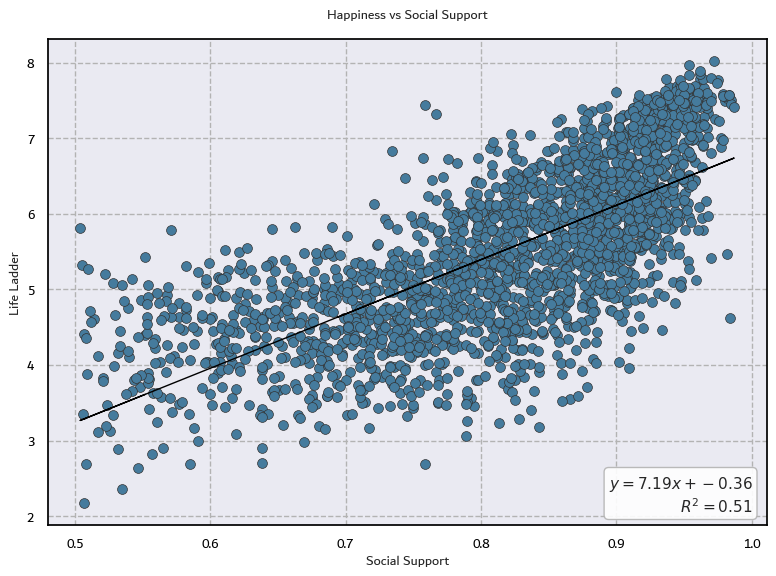

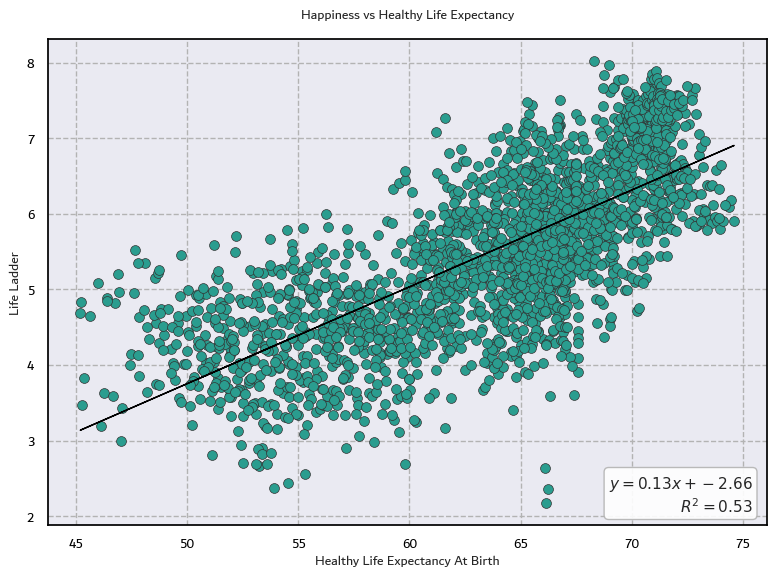

In [12]:
from scipy.stats import linregress
import numpy as np

# Function to remove outliers based on IQR for 2 columns
def remove_outliers(df, x_col, y_col):
    Q1_x, Q3_x = df[x_col].quantile([0.25, 0.75])
    Q1_y, Q3_y = df[y_col].quantile([0.25, 0.75])
    IQR_x = Q3_x - Q1_x
    IQR_y = Q3_y - Q1_y
    mask = (
        (df[x_col] >= Q1_x - 1.5 * IQR_x) & (df[x_col] <= Q3_x + 1.5 * IQR_x) &
        (df[y_col] >= Q1_y - 1.5 * IQR_y) & (df[y_col] <= Q3_y + 1.5 * IQR_y)
    )
    return df[mask]

# Reusable plot function with trendline and equation
def plot_scatter_with_regression(df, x, y, color, title, filename):
    df_clean = remove_outliers(df, x, y)
    slope, intercept, r_value, _, _ = linregress(df_clean[x], df_clean[y])
    reg_line = slope * df_clean[x] + intercept

    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(
        x=x, y=y, data=df_clean,
        s=50, color=color, edgecolor='0.2', linewidth=0.5
    )

    # Plot regression line
    plt.plot(df_clean[x], reg_line, color='black', linestyle='-', linewidth=1)

    # Show equation
    eq_text = f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}'
    x_pos = df_clean[x].max() * 0.65
    y_pos = df_clean[y].min() + (df_clean[y].max() - df_clean[y].min()) * 0.05
    # Show regression equation and R² in a box (lower right)
    eq_text = f'$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_value**2:.2f}$'
    plt.text(
        0.98, 0.02, eq_text,
        fontsize=11,
        fontproperties=dubai_font,
        fontweight='bold',
        ha='right', va='bottom',
        transform=ax.transAxes,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='0.7', alpha=0.9)
    )

    # Labels and style
    plt.title(title, fontsize=27, fontproperties=dubai_font, pad=15)
    plt.xlabel(x, fontsize=10, fontproperties=dubai_font)
    plt.ylabel(y, fontsize=10, fontproperties=dubai_font)
    plt.xticks(fontproperties=dubai_font)
    plt.yticks(fontproperties=dubai_font)
    style_axes(ax)
    plt.tight_layout()
    plt.savefig(f"{output_dir}\\{filename}", dpi=600, format='jpg')
    plt.show()

# === Plot 1: GDP vs Life Ladder ===
plot_scatter_with_regression(
    df, x='Log Gdp Per Capita', y='Life Ladder',
    color='#e63946',
    title='Happiness vs GDP per Capita',
    filename='6.2_GDP vs Life Ladder.jpg'
)

# === Plot 2: Social Support vs Life Ladder ===
plot_scatter_with_regression(
    df, x='Social Support', y='Life Ladder',
    color='#457b9d',
    title='Happiness vs Social Support',
    filename='6.2_Social Support vs Life Ladder.jpg'
)

# === Plot 3: Healthy Life Expectancy vs Life Ladder ===
plot_scatter_with_regression(
    df, x='Healthy Life Expectancy At Birth', y='Life Ladder',
    color='#2a9d8f',
    title='Happiness vs Healthy Life Expectancy',
    filename='6.2_Healthy Life Expectancy vs Life Ladder.jpg'
)

# Pair Plot

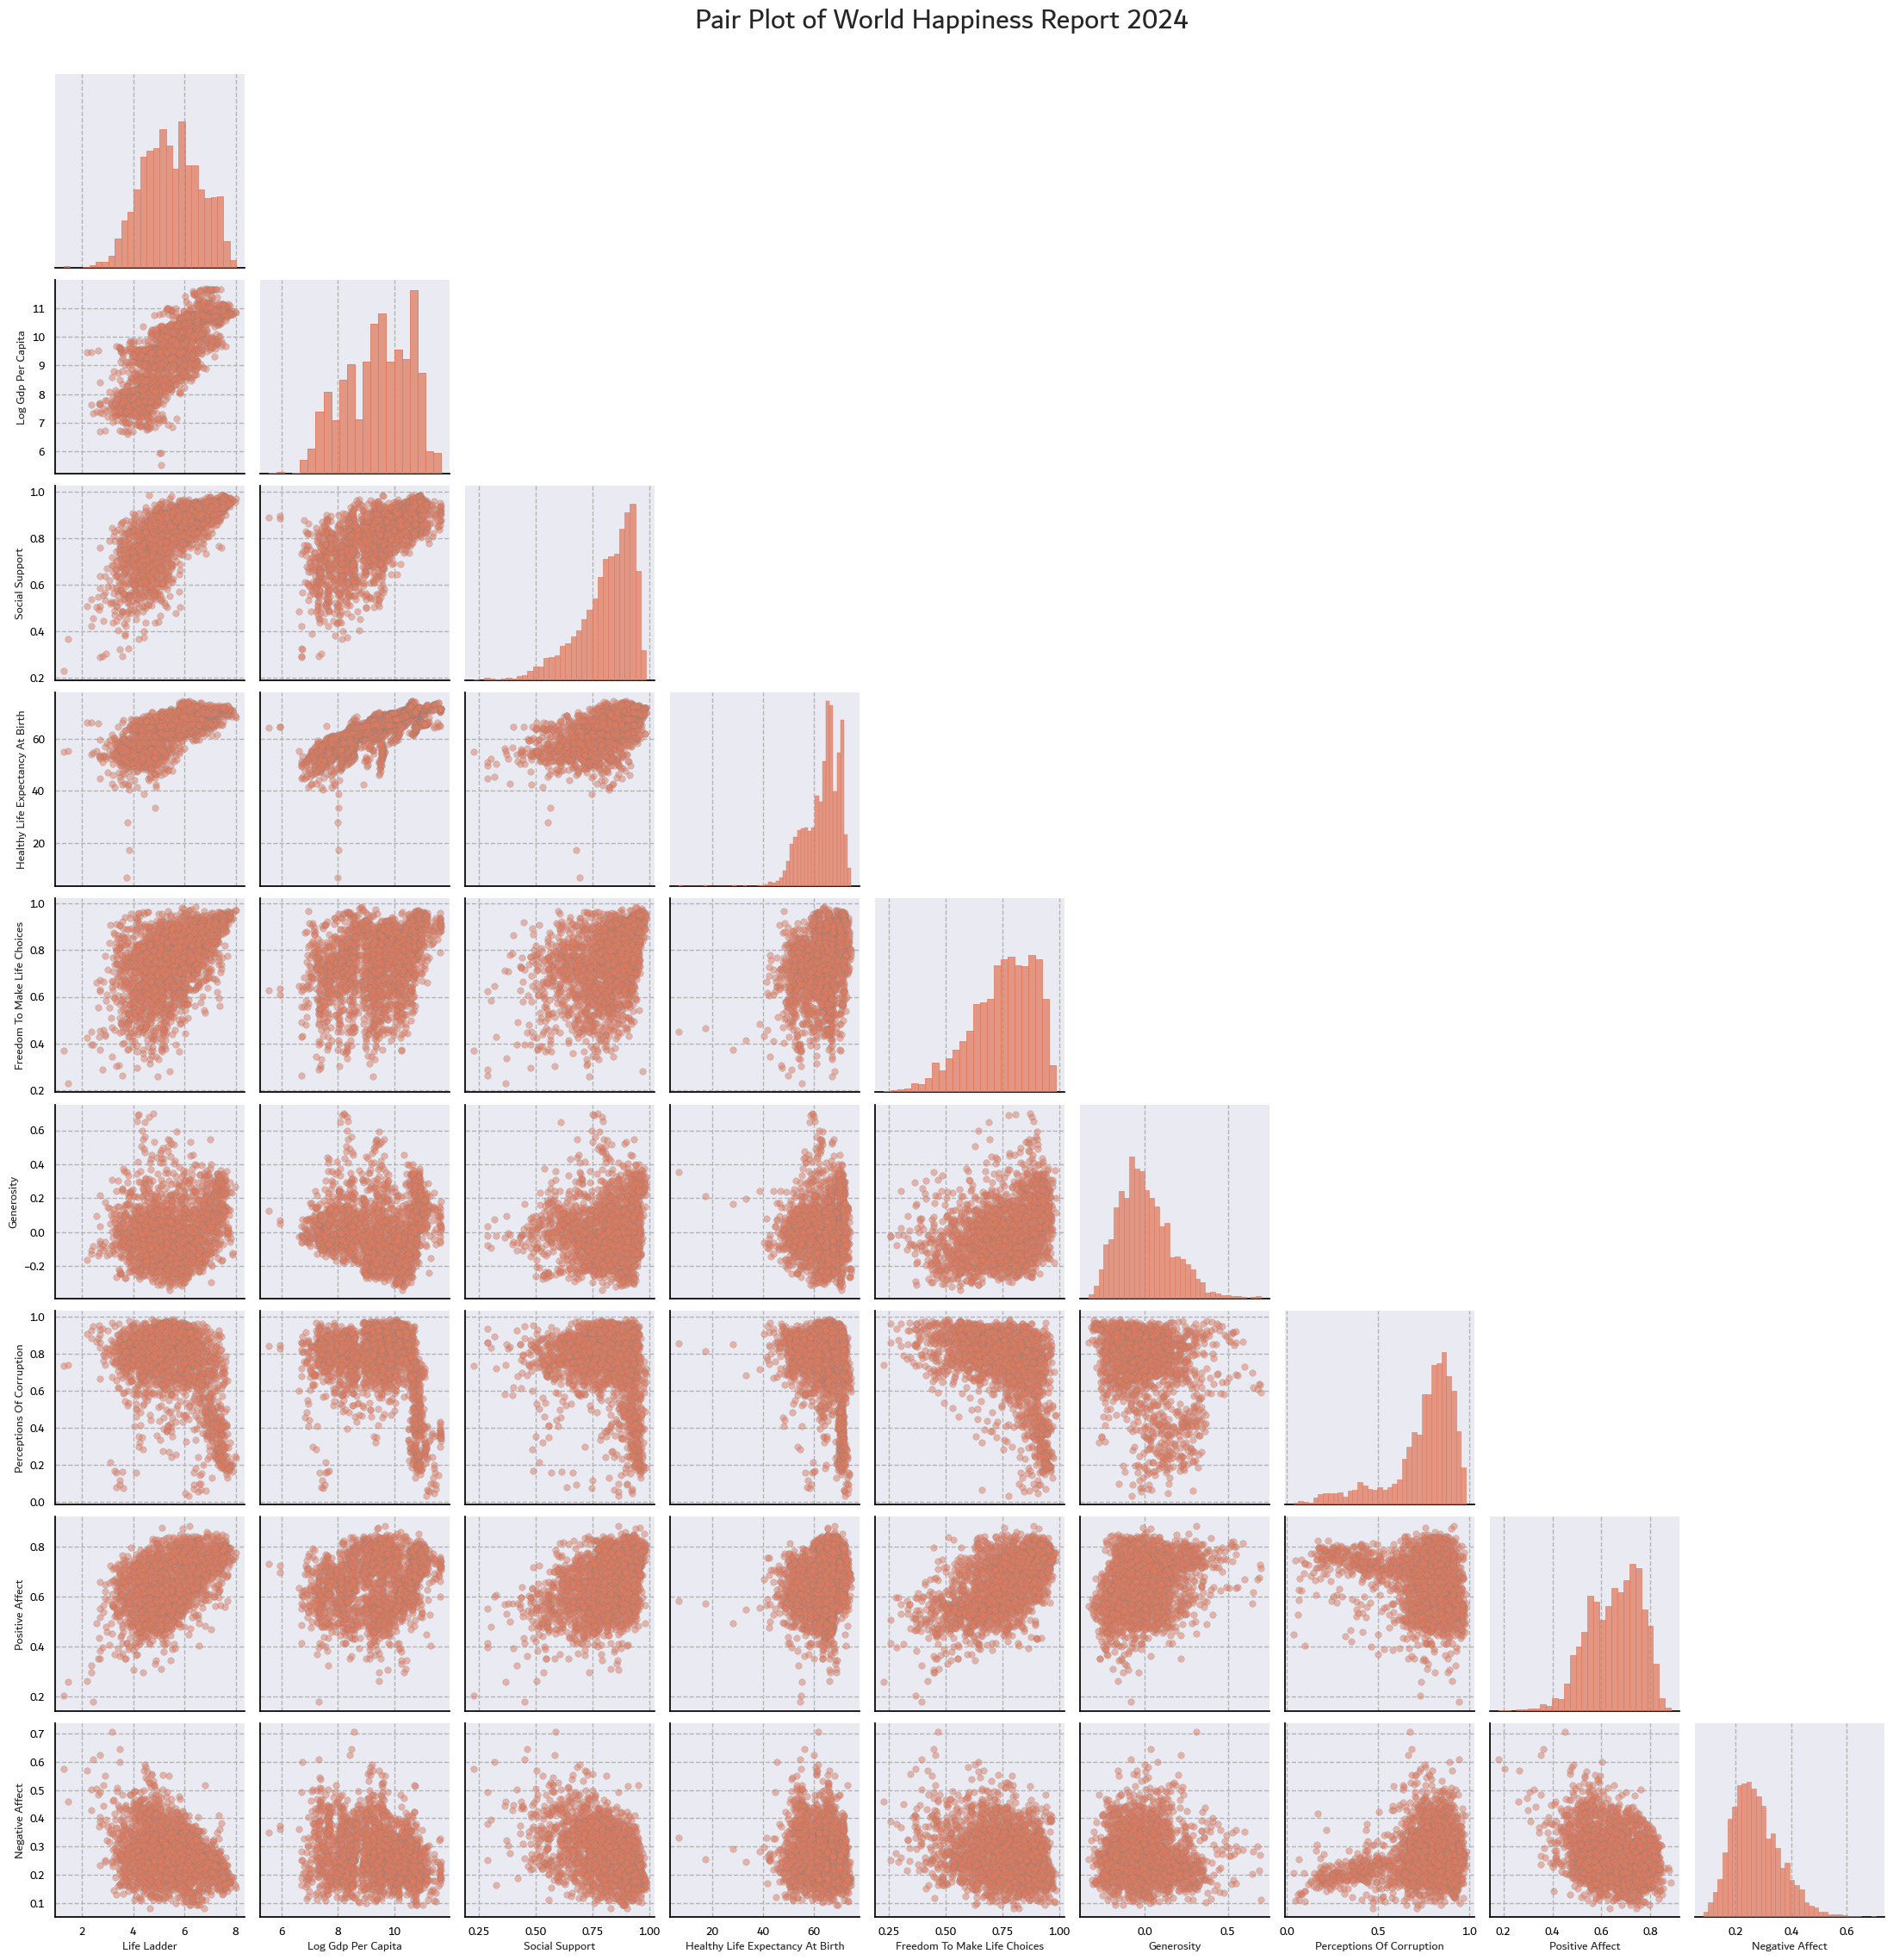

In [16]:
# Select numeric columns
numeric_cols = [
    'Life Ladder', 
    'Log Gdp Per Capita', 
    'Social Support',
    'Healthy Life Expectancy At Birth',
    'Freedom To Make Life Choices',
    'Generosity',
    'Perceptions Of Corruption',
    'Positive Affect',
    'Negative Affect'
]

# Set Seaborn base style
sns.set(style="dark", context="notebook")

# Create pairplot with color customization
pair_plot = sns.pairplot(
    df[numeric_cols],
    corner=True,
    plot_kws={
        'alpha': 0.5,
        's': 30,
        'color': '#e07a5f',
        'edgecolor': '0.5',
        'linewidth': 0.3
    },
    diag_kws={
        'color': '#e07a5f',
        'edgecolor': '#e07a5f'
    }
)

# Title
plt.suptitle(
    "Pair Plot of World Happiness Report 2024",
    fontsize=24,
    fontproperties=dubai_font,
    weight='bold',
    y=1.02
)

# Apply custom styles to all subplots
for ax in pair_plot.axes.flat:
    if ax is not None:
        # Gridlines (30% grey)
        ax.grid(True, linestyle='--', color='0.7')

        # Spines (black border)
        for spine in ax.spines.values():
            spine.set_color('black')

        # Tick marks (black)
        ax.tick_params(axis='both', direction='out', length=5, width=1, colors='black')

        # Font for labels
        ax.set_title(ax.get_title(), fontproperties=dubai_font)
        ax.set_xlabel(ax.get_xlabel(), fontproperties=dubai_font)
        ax.set_ylabel(ax.get_ylabel(), fontproperties=dubai_font)
        for label in ax.get_xticklabels():
            label.set_fontproperties(dubai_font)
        for label in ax.get_yticklabels():
            label.set_fontproperties(dubai_font)

# Save high-res output
output_dir = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis"
output_file = f"{output_dir}\\6.2_Pair Plot - World Happiness Report 2024.jpg"
plt.savefig(output_file, dpi=600, bbox_inches='tight', format='jpg')
plt.show()

## 🔗 Interpretation of Pair Plot: World Happiness Report 2024

The pair plot above visualizes the relationships between all key variables in the dataset, showing scatterplots for each pair of variables and histograms for their individual distributions. This comprehensive view helps reveal patterns, correlations, and possible outliers in the data.

---

### **Key Observations**

- **Strong Positive Relationships**  
  - The **Life Ladder** (happiness score) shows strong positive associations with variables like **Log GDP per Capita**, **Healthy Life Expectancy at Birth**, **Social Support**, and **Freedom to Make Life Choices**. This is visible in the tight, upward-trending clouds in the relevant scatterplots.
  - These relationships confirm that higher income, better health, robust social support, and personal freedom are all linked to higher happiness levels.

- **Negative Associations**  
  - **Perceptions of Corruption** and **Negative Affect** display negative relationships with happiness and other well-being indicators. For example, as perceptions of corruption rise, both happiness and social trust decrease, which is evident from downward-trending plots.

- **Distributions and Skewness**  
  - The histograms along the diagonal show that variables like **Generosity** and **Negative Affect** are skewed, suggesting that most countries cluster toward lower values in these variables, with a long tail toward higher values.

- **Weak or No Relationships**  
  - Some variables, such as **Generosity**, don’t display a strong relationship with most other factors, indicating that generosity varies independently from economic or health-related measures in this dataset.

- **Clustering and Outliers**  
  - The pair plot reveals that most countries form dense clusters, but there are a few outliers—countries that do not fit the general trend. These could be interesting targets for further, case-specific analysis.

---

### **Practical Implications**

- **Happiness is Multi-Factorial:**  
  No single factor alone explains happiness—economic, health, social, and psychological factors all work together. Any policy or intervention aimed at improving national well-being should address this full spectrum.
- **Spotting Priorities:**  
  The clearest positive relationships suggest that investing in public health, economic development, and social safety nets are among the most reliable ways to boost overall happiness.

### Categorical Plot

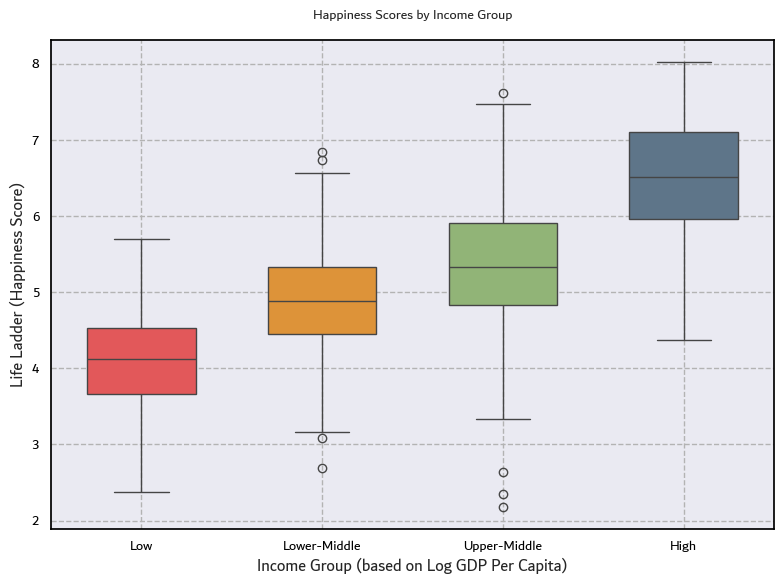

In [17]:
# Categorize income based on GDP
df['Income Group'] = pd.cut(
    df['Log Gdp Per Capita'],
    bins=[0, 8, 9, 10, 12],
    labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High']
)

# Define custom Coolors palette
coolors_palette = ['#f94144', '#f8961e', '#90be6d', '#577590']
income_palette = dict(zip(['Low', 'Lower-Middle', 'Upper-Middle', 'High'], coolors_palette))

# Plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x='Income Group',
    y='Life Ladder',
    hue='Income Group',
    data=df,
    palette=income_palette,
    width=0.6,
    linewidth=1,
    legend=False
)

# Style adjustments
ax.grid(True, linestyle='--', color='0.7')
for spine in ax.spines.values():
    spine.set_color('black')
ax.tick_params(axis='both', direction='out', length=5, width=1, colors='black')

# Labels and fonts
plt.title('Happiness Scores by Income Group', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xlabel('Income Group (based on Log GDP Per Capita)', fontsize=12, fontproperties=dubai_font)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12, fontproperties=dubai_font)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)

# Save
output_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.2_Boxplot Income vs Life Ladder.jpg"
plt.tight_layout()
plt.savefig(output_path, dpi=600, format='jpg')
plt.show()

## 💸 Income Group and Happiness: Boxplot Interpretation

### **Key Insights**

- **Clear Positive Trend:**  
  Median happiness scores rise consistently as we move from low to high income groups. This confirms a strong link between national income level and population well-being.

- **Spread and Overlap:**  
  While higher income groups generally report higher happiness, there is some overlap. Some countries in the lower and lower-middle income groups have happiness scores similar to those in higher groups—showing income isn’t the only factor at play.

- **Less Variation at the Top:**  
  The spread (interquartile range) in happiness scores decreases for high-income countries, meaning people’s life satisfaction is not only higher but also more consistent within these nations.

- **Outliers:**  
  There are a few outliers in each group, highlighting exceptions where countries score significantly above or below the group norm. These could be driven by unique national circumstances, such as social factors, political stability, or culture.

---

### **Bottom Line**

Higher national income is strongly associated with greater happiness, but it is not the sole determinant. Other factors (like health, governance, social support) also shape life satisfaction—explaining why some lower-income countries outperform and some high-income countries underperform compared to their peers.


## 🧐 Revisiting & Answering Key Questions

### 🔍 Clarifying Questions

**Q1: What factors are most strongly associated with high or low Life Ladder (happiness) scores?**  
**A:**  
Based on the correlation matrix and scatterplots, the variables most strongly associated with higher happiness scores are:  
- **Log GDP per Capita**  
- **Social Support**  
- **Healthy Life Expectancy at Birth**  
- **Freedom to Make Life Choices**  
Higher values in these areas correspond with higher Life Ladder scores. Conversely, higher Perceptions of Corruption and Negative Affect are negatively correlated with happiness.

**Q2: Why do some countries show significantly higher perceptions of corruption despite similar GDP levels?**  
**A:**  
The pair plots and the matrix indicate that while GDP per capita and happiness are closely linked, Perceptions of Corruption can vary significantly even among countries with similar wealth. This suggests that economic prosperity alone does not guarantee lower perceived corruption. Factors like governance, political stability, and cultural attitudes likely play a major role.

---

### 📉 Funneling Questions

**Q3: Have happiness scores declined or improved significantly in certain regions over the last decade? Why?**  
**A:**  
This question requires further time-series analysis by region. The current analysis focused mainly on cross-sectional relationships, but this will be addressed in the next steps using the “Year” and “Country” fields.

**Q4: Do economic downturns (reflected in GDP per capita) correlate with declines in social support or perceived freedom?**  
**A:**  
The correlation analysis shows that GDP per capita, social support, and freedom are positively related at the country level. However, examining temporal changes during economic downturns would require slicing the data by year and economic events—another candidate for follow-up analysis.

---

### 🌍 Adjoining Questions

**Q5: Are countries with higher generosity scores also those with better social support or freedom indices?**  
**A:**  
The pair plot shows that generosity has only a weak relationship with both social support and freedom indices. There is no strong, consistent pattern connecting these variables globally.

**Q6: How does healthy life expectancy interact with GDP and subjective happiness?**  
**A:**  
Healthy life expectancy is strongly and positively correlated with both GDP per capita and happiness. Higher GDP generally means higher life expectancy, which in turn is linked with higher happiness.

---

### 🧠 Elevating Questions

**Q7: How consistent are the predictors of happiness across regions and cultures?**  
**A:**  
The analysis confirms the global importance of wealth, social support, and health, but outliers exist—some low-income countries achieve higher happiness than their GDP would predict, likely due to cultural or social factors. Regional analysis could further clarify these patterns.

**Q8: Can countries with low GDP still achieve high happiness through strong social support and freedom?**  
**A:**  
Yes, the boxplot and scatterplots indicate several cases where countries in lower income groups report relatively high happiness, likely driven by high social support, perceived freedom, or cultural resilience.

---

## ➕ New Questions Arising from Early Findings

- Are there notable outliers (countries that do not fit the expected patterns) and what factors explain them?
- Does the relationship between happiness and its predictors (e.g., GDP, health, social support) change over time or in response to global events?
- How do within-country inequalities (urban vs. rural, regional disparities) affect national happiness averages?

## 🧪 Hypotheses for Further Analysis

Based on initial visualizations and correlation analysis of the World Happiness Report 2024 dataset, the following hypotheses are proposed for formal testing in the next steps:

---

### 1. **GDP and Happiness**
**Hypothesis:**  
Countries with higher log GDP per capita will have significantly higher Life Ladder (happiness) scores compared to those with lower GDP per capita.

---

### 2. **Social Support and Happiness**
**Hypothesis:**  
Greater average social support is associated with higher national happiness scores, regardless of GDP per capita.

---

### 3. **Healthy Life Expectancy and Happiness**
**Hypothesis:**  
There is a positive association between healthy life expectancy at birth and national happiness scores.

---

### 4. **Perceptions of Corruption and Happiness**
**Hypothesis:**  
Countries with lower perceptions of corruption will have higher happiness scores, even after accounting for GDP.

---

### 5. **Freedom to Make Life Choices**
**Hypothesis:**  
Countries reporting greater freedom to make life choices will also report higher Life Ladder scores.

---

### 6. **Generosity’s Limited Impact**
**Hypothesis:**  
Generosity scores have a weaker and less consistent relationship with happiness compared to GDP, health, or social support.

---

### 7. **Income Group Differences**
**Hypothesis:**  
Median happiness scores will increase across income groups (Low, Lower-Middle, Upper-Middle, High), but there will be overlap and outliers within each group.

---

### 8. **Multifactorial Predictors**
**Hypothesis:**  
No single factor fully predicts national happiness; instead, the highest happiness scores will be observed in countries that combine high GDP, strong social support, good health, and low corruption.
